In [11]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import statistics
import numpy as np
import matplotlib.ticker as mticker

In [12]:
yf.pdr_override() #activate yahoo finance workaround
year=1980
start =dt.datetime(year,1,1) #Sets start point of dataframe
now = dt.datetime.now() #Sets end point of dataframe

In [14]:
stock = "SPY"

[*********************100%***********************]  1 of 1 completed
Enter the sma : 30
Enter Warning Limit : 10
2.3507588098949705
Mean: 0.5392467905487394
Standard Dev: 3.0930913464036305


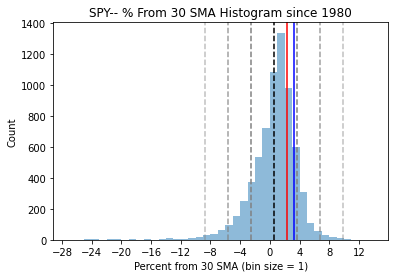

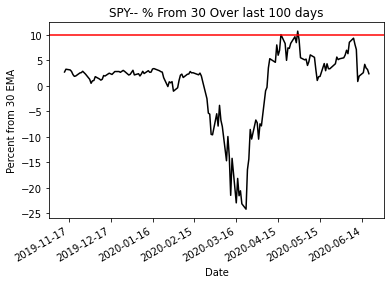

In [16]:
fig, ax1 = plt.subplots() #Create Plots


df = pdr.get_data_yahoo(stock, start, now) #Fetches stock price data, saves as data frame

sma = int(input("Enter the sma : ")) #Asks for stock ticker
limit= int(input("Enter Warning Limit : "))
df['SMA'+str(sma)] = df.iloc[:,4].rolling(window=sma).mean() #calculates sma and creates a column in the dataframe
df['PC'] = ((df["Adj Close"]/df['SMA'+str(sma)])-1)*100

mean =df["PC"].mean()
stdev=df["PC"].std()
current=df["PC"][-1]
yday=df["PC"][-2]



print(str(current))

print("Mean: "+str(mean))
print("Standard Dev: "+str(stdev))

  
bins = np.arange(-100, 100, 1) # fixed bin size

plt.xlim([df["PC"].min()-5, df["PC"].max()+5])

plt.hist(df["PC"], bins=bins, alpha=0.5)
plt.title(stock+"-- % From "+str(sma)+" SMA Histogram since "+str(year))
plt.xlabel('Percent from '+str(sma)+' SMA (bin size = 1)')
plt.ylabel('Count')

plt.axvline( x=mean, ymin=0, ymax=1, color='k', linestyle='--')
plt.axvline( x=stdev+mean, ymin=0, ymax=1, color='gray', alpha=1, linestyle='--')
plt.axvline( x=2*stdev+mean, ymin=0, ymax=1, color='gray',alpha=.75, linestyle='--')
plt.axvline( x=3*stdev+mean, ymin=0, ymax=1, color='gray', alpha=.5, linestyle='--')
plt.axvline( x=-stdev+mean, ymin=0, ymax=1, color='gray', alpha=1, linestyle='--')
plt.axvline( x=-2*stdev+mean, ymin=0, ymax=1, color='gray',alpha=.75, linestyle='--')
plt.axvline( x=-3*stdev+mean, ymin=0, ymax=1, color='gray', alpha=.5, linestyle='--')

plt.axvline( x=current, ymin=0, ymax=1, color='r')
plt.axvline( x=yday, ymin=0, ymax=1, color='blue')

ax1.xaxis.set_major_locator(mticker.MaxNLocator(14)) #add more x axis labels


fig2, ax2 = plt.subplots() #Create Plots

df=df[-150:]

df['PC'].plot(label='close',color='k')
plt.title(stock+"-- % From "+str(sma)+" Over last 100 days")
plt.xlabel('Date') 
plt.ylabel('Percent from '+str(sma)+' EMA')
ax2.xaxis.set_major_locator(mticker.MaxNLocator(8)) #add more x axis labels
plt.axhline( y=limit, xmin=0, xmax=1, color='r')

plt.show()